In [1]:
%reset -f

In [2]:
import os
import math
import pandas as pd
import matplotlib.pyplot as plt

### Read data

In [3]:
def read_data(data_dir):
    data = []  # List to store (benchmark, IPC value) tuples
    for file in os.listdir(data_dir):
        if file.endswith(".txt"):

            if os.path.getsize(os.path.join(data_dir, file)) == 0:
                print(f"File {file} is empty, directory: {data_dir}, skipping...")
                continue

            ipc_found = False
            with open(os.path.join(data_dir, file), "r") as f:
                for line in f:
                    if "CPU 0 cumulative IPC:" in line:
                        ipc_found = True
                        try:
                            # Extract the IPC value
                            ipc_value = float(
                                line.split("CPU 0 cumulative IPC:")[1].split()[0]
                            )
                            # Append to list
                            data.append((file.split(".txt")[0], ipc_value))
                        except (IndexError, ValueError):
                            print(f"Couldn't extract IPC value from line: {line}")

            if not ipc_found:
                print(f"IPC value not found in file: {file}")

    # Create DataFrame from the data
    df = pd.DataFrame(data, columns=["Benchmark", "IPC"])

    # Sort the DataFrame by Benchmark name
    df = df.sort_values(by=["Benchmark"])

    # Calculate Geometric Mean
    try:
        geomean = math.prod(df["IPC"]) ** (1 / len(df["IPC"]))
        geomean_df = pd.DataFrame([{"Benchmark": "Geomean", "IPC": geomean}])
        df = pd.concat([df, geomean_df], ignore_index=True)
    except ZeroDivisionError:
        print(f"Some IPC values are zero, exiting...")
        exit(1)

    df = df.reset_index(drop=True)

    return df

In [4]:
bl_0_ipc_df = read_data("no_flush_0")
bl_3_ipc_df = read_data("no_flush_3")
bl_5_ipc_df = read_data("no_flush_5")
bl_7_ipc_df = read_data("no_flush_7")
bl_9_ipc_df = read_data("no_flush_9")

sf_0_ipc_df = read_data("scheduling_flush_0")
sf_3_ipc_df = read_data("scheduling_flush_3")
sf_5_ipc_df = read_data("scheduling_flush_5")
sf_7_ipc_df = read_data("scheduling_flush_7")
sf_9_ipc_df = read_data("scheduling_flush_9")

In [5]:
def calculate_speedup(df, baseline_df):
    df["Speedup"] = ((df["IPC"] / baseline_df["IPC"]) - 1) * 100

    return df

In [6]:
bl_3_ipc_df = calculate_speedup(bl_3_ipc_df, bl_0_ipc_df)
bl_5_ipc_df = calculate_speedup(bl_5_ipc_df, bl_0_ipc_df)
bl_7_ipc_df = calculate_speedup(bl_7_ipc_df, bl_0_ipc_df)
bl_9_ipc_df = calculate_speedup(bl_9_ipc_df, bl_0_ipc_df)

sf_0_ipc_df = calculate_speedup(sf_0_ipc_df, bl_0_ipc_df)
sf_3_ipc_df = calculate_speedup(sf_3_ipc_df, bl_0_ipc_df)
sf_5_ipc_df = calculate_speedup(sf_5_ipc_df, bl_0_ipc_df)
sf_7_ipc_df = calculate_speedup(sf_7_ipc_df, bl_0_ipc_df)
sf_9_ipc_df = calculate_speedup(sf_9_ipc_df, bl_0_ipc_df)

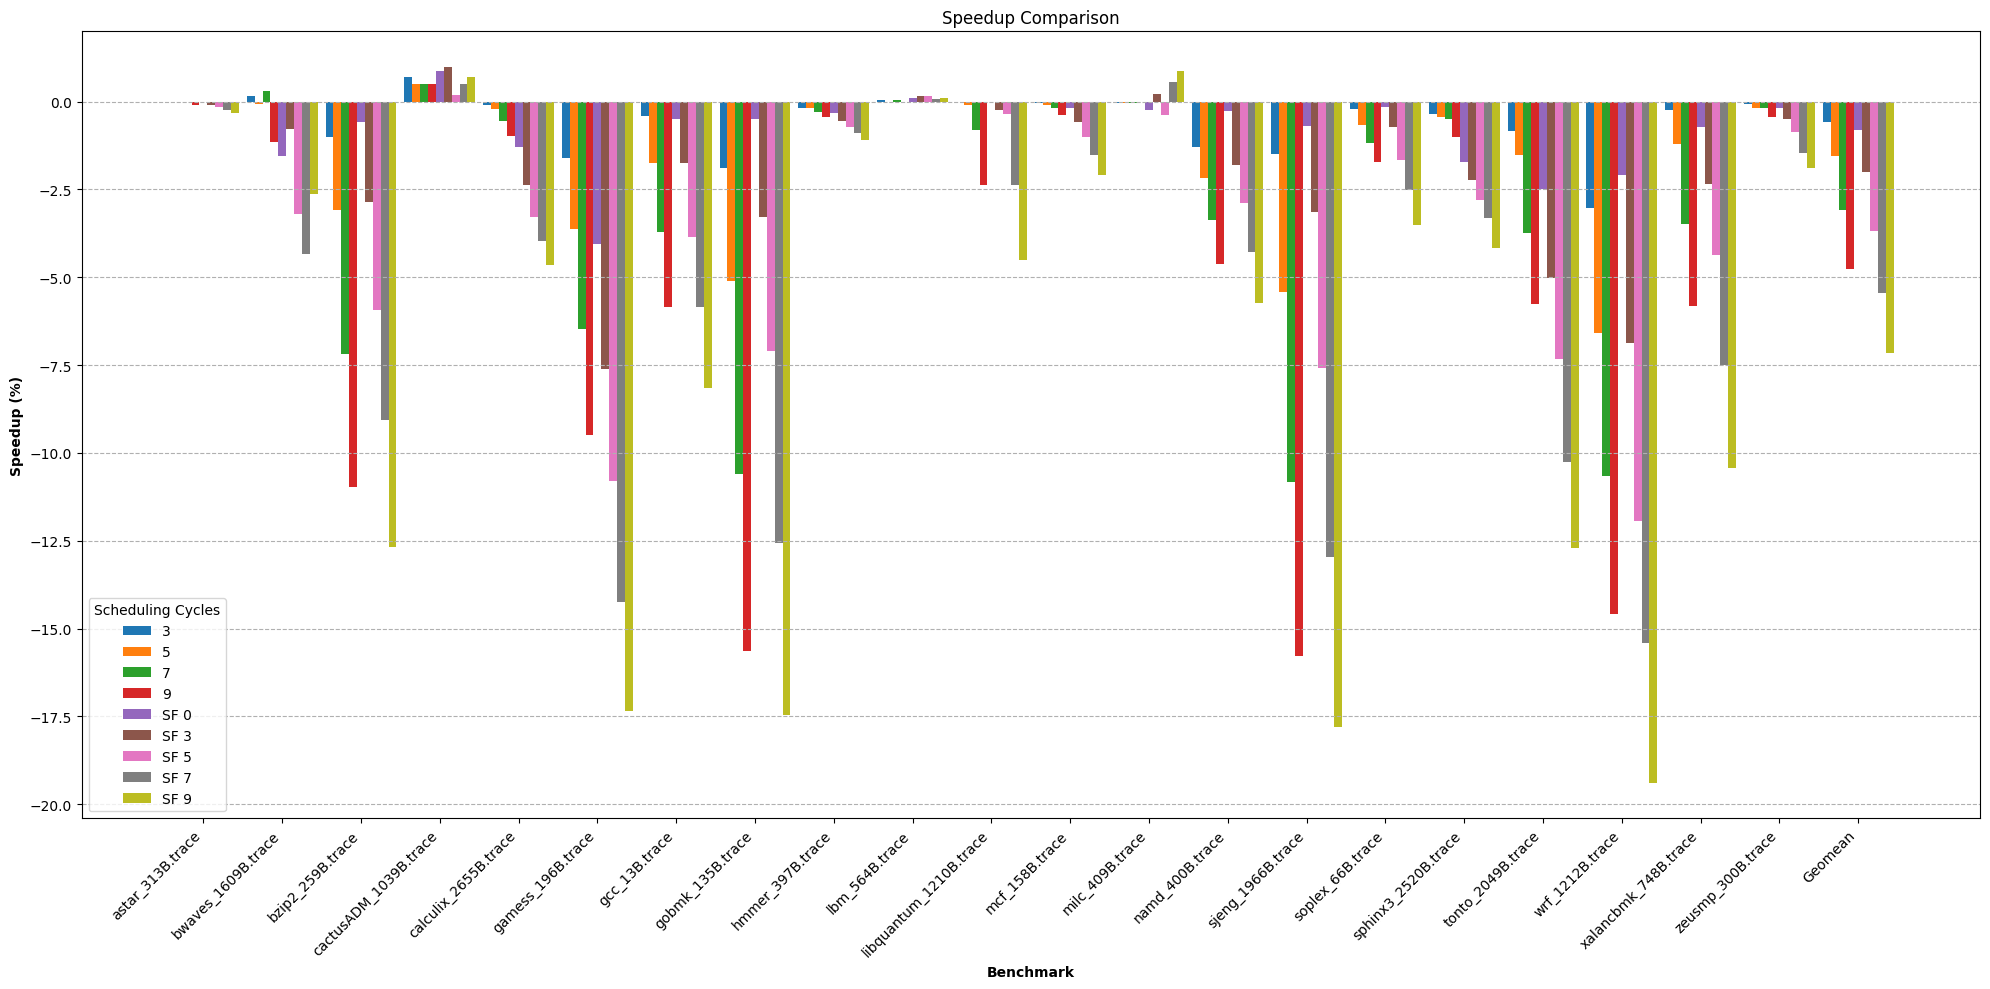

In [7]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Define the width of each bar
bar_width = 0.1  # Reduced bar width to prevent overlap

# Define the positions of the bars
r1 = range(len(bl_0_ipc_df))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]
r6 = [x + bar_width for x in r5]
r7 = [x + bar_width for x in r6]
r8 = [x + bar_width for x in r7]
r9 = [x + bar_width for x in r8]

# Plot the bars
plt.bar(r1, bl_3_ipc_df["Speedup"], width=bar_width, label="3")
plt.bar(r2, bl_5_ipc_df["Speedup"], width=bar_width, label="5")
plt.bar(r3, bl_7_ipc_df["Speedup"], width=bar_width, label="7")
plt.bar(r4, bl_9_ipc_df["Speedup"], width=bar_width, label="9")
plt.bar(r5, sf_0_ipc_df["Speedup"], width=bar_width, label="SF 0")
plt.bar(r6, sf_3_ipc_df["Speedup"], width=bar_width, label="SF 3")
plt.bar(r7, sf_5_ipc_df["Speedup"], width=bar_width, label="SF 5")
plt.bar(r8, sf_7_ipc_df["Speedup"], width=bar_width, label="SF 7")
plt.bar(r9, sf_9_ipc_df["Speedup"], width=bar_width, label="SF 9")

# Add labels
plt.xlabel("Benchmark", fontweight="bold")
plt.ylabel("Speedup (%)", fontweight="bold")
plt.title("Speedup Comparison")
plt.xticks(
    [r + 4 * bar_width for r in range(len(bl_0_ipc_df))],  # Adjusted x-ticks position
    bl_0_ipc_df["Benchmark"],
    rotation=45,
    ha="right",
)

# Add gridlines
plt.grid(axis="y", linestyle="--")

# Add legend
plt.legend(title="Scheduling Cycles")

# Adjust layout
plt.tight_layout()
plt.show()